In [1]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

defining grid size, time steps, etc...

In [2]:
nx = 81 # number of spatial grid points
dx = 0.25  # distance between gird points
dt = 0.0002  # time-increment
gamma = 1.4  # reasonable value to model air
t= 0.01  # calculated time

set basic initial condition parameters: initial density, velocity and pressure on the left and right side of tube

In [4]:
x = numpy.linspace(-10, 10, nx)

rho = numpy.ones(nx)
rho[40:] = 0.125  # initial density

u = numpy.zeros(nx)  # initial velocity

p = numpy.ones(nx)
p[:40] = 100000
p[40:] = 10000  # initial pressure

(0, 1.5)

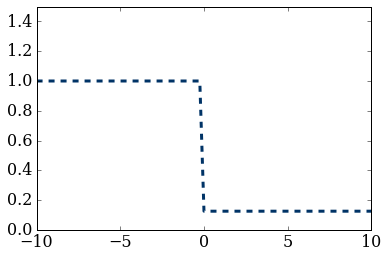

In [8]:
pyplot.plot(x, rho, color='#003366', ls='--', lw=3)
pyplot.ylim(0,1.5)

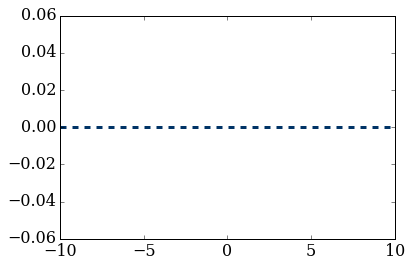

In [9]:
pyplot.plot(x, u, color='#003366', ls='--', lw=3)

(0, 110000)

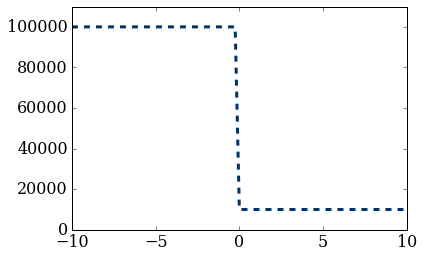

In [11]:
pyplot.plot(x, p, color='#003366', ls='--', lw=3)
pyplot.ylim(0,110000)

In [12]:
et = p/(gamma-1)/rho+0.5*u**2  # total energy per unit mass

define the vector u

In [13]:
u1 = rho
u2 = rho*u
u3 = rho*et

define the flux vector by the function of vector u

In [14]:
def functionf1(u1, u2, u3):
    return u2
def functionf2(u1, u2, u3):
    return u2**2/u1 + (gamma-1)*(u3-0.5*u2**2/u1)
def functionf3(u1, u2, u3):
    return (u3 + (gamma-1)*(u3-0.5*u2**2/u1))*u2/u1